In [4]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np

In [41]:
pages_list = np.arange(1,108, 1)
pages_list

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107])

### API call to get the list of location IDs

In [42]:
url_endpoint = "https://api.cqc.org.uk/public/v1/locations?" 
outputs = []

for p in pages_list:
    params_dict = {'perPage':1000,
                   'partnerCode':"OpenAnswers",
                   'page': p}
    response = requests.get(url_endpoint, params_dict)
    output_dict = response.json()
    for i in range(len(output_dict['locations'])):
        outputs.append(output_dict['locations'][i]['locationId'])


In [43]:
len(outputs)

107000

In [13]:
type(output_dict['locations'])

list

In [45]:
! pwd

/home/willbanny/code/willbanny/Location-Analysis/carehome_api


In [47]:
ids_df = pd.DataFrame(
    {'location_IDs': outputs})
ids_df

,location_IDs
0,1-10000302982
1,1-10000367985
2,1-10000433668
3,1-10000697432
4,1-10000792582
...,...
106995,RYGDA
106996,RYGEF
106997,RYGEJ
106998,RYGEW


In [48]:
ids_df.to_csv("../raw_data/carehome_ids.csv")

In [37]:
locations = output_dict['locations']
locations[0].get('locationID', "null")
locations[0]

{'locationId': '1-1000711804',
 'locationName': 'Belmont Grange Nursing and Residential Home',
 'postalCode': 'DH1 2QW'}

#### API call to take each ID and get lat/lon and extra info

In [49]:
location_names = []
lats = []
lons = []
num_beds = []
town_city = []
region = []
carehome_y_n = []

for i in outputs:
    loc_url = f"https://api.cqc.org.uk/public/v1/locations/{i}?partnerCode=OpenAnswers"
    loc_response = requests.get(loc_url).json()
    lats.append(loc_response.get('onspdLatitude', 'N/A'))
    lons.append(loc_response.get('onspdLongitude', 'N/A'))
    location_names.append(loc_response.get('name', 'N/A'))
    num_beds.append(loc_response.get('numberOfBeds', 'N/A'))
    town_city.append(loc_response.get('postalAddressTownCity', 'N/A'))
    region.append(loc_response.get('region', 'N/A'))
    carehome_y_n.append(loc_response.get('careHome', 'N/A'))

len(lats), len(lons), len(location_names), len(num_beds), len(town_city), len(region), len(carehome_y_n)

ConnectionError: HTTPSConnectionPool(host='api.cqc.org.uk', port=443): Max retries exceeded with url: /public/v1/locations/1-2175653308?partnerCode=OpenAnswers (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f6fb552cb50>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

### Old method of calling API

In [163]:
location_names = []
lats = []
lons = []
num_beds = []
town_city = []
region = []
carehome_y_n = []

for i in locations:
    loc = (i['locationId'])
    loc_url = f"https://api.cqc.org.uk/public/v1/locations/{loc}?partnerCode=OpenAnswers"
    loc_response = requests.get(loc_url).json()
    lats.append(loc_response.get('onspdLatitude', 'N/A'))
    lons.append(loc_response.get('onspdLongitude', 'N/A'))
    location_names.append(loc_response.get('name', 'N/A'))
    num_beds.append(loc_response.get('numberOfBeds', 'N/A'))
    town_city.append(loc_response.get('postalAddressTownCity', 'N/A'))
    region.append(loc_response.get('region', 'N/A'))
    carehome_y_n.append(loc_response.get('careHome', 'N/A'))


In [164]:
len(lats), len(lons), len(location_names), len(num_beds), len(town_city), len(region), len(carehome_y_n)

(10000, 10000, 10000, 10000, 10000, 10000, 10000)

In [147]:
# lats = lats[:-1]
# lons = lons[:-1]
# location_names = loc[:-1]

### Converting API output into DF and scatters & CSV

In [50]:
carehomes_df = pd.DataFrame(
    {'Location_Names': location_names,
     'latitude': lats,
     'longitude': lons,
     'num_beds': num_beds,
     'town_city': town_city,
     'region': region,
     'carehome_y_n': carehome_y_n
    })

In [51]:
carehomes_df = carehomes_df[carehomes_df['carehome_y_n'] == "Y"]

In [52]:
carehomes_df.to_csv("../raw_data/carehome_locations.csv")

In [65]:
carehomes_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20803 entries, 0 to 53533
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Location_Names  20803 non-null  object
 1   latitude        20803 non-null  object
 2   longitude       20803 non-null  object
 3   num_beds        20803 non-null  object
 4   town_city       20803 non-null  object
 5   region          20803 non-null  object
 6   carehome_y_n    20803 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


In [78]:
carehomes_df_clean[carehomes_df_clean['latitude'] == "N/A"]

,Location_Names,latitude,longitude,num_beds,town_city,region,carehome_y_n
30751,Overstone House Care Home,N/A,N/A,66,Northampton,N/A,Y
31168,Shipley Manor Care Home,N/A,N/A,66,Shipley,N/A,Y
31277,Thorn Springs,N/A,N/A,66,Dunstable,N/A,Y
32683,Overstone House Care Home,N/A,N/A,66,Northampton,N/A,Y
36486,Old Norse Lodge Care Home,N/A,N/A,66,Grimsby,N/A,Y


In [76]:
carehomes_df_clean = carehomes_df[carehomes_df['longitude'] != "N/A"]
carehomes_df_clean = carehomes_df[carehomes_df['latitude'] != "N/A"]
carehomes_df_clean = carehomes_df[carehomes_df['num_beds'] != "N/A"]
carehomes_df_clean

,Location_Names,latitude,longitude,num_beds,town_city,region,carehome_y_n
0,Henley House,52.088019,1.150452,66,Ipswich,East,Y
5,Charlotte House,53.345515,-3.00258,103,Wirral,North West,Y
6,Regency Care Centre,53.558464,-2.295343,60,Bury,North West,Y
10,Kingswood House Nursing Home,50.857483,0.561912,22,St Leonards On Sea,South East,Y
13,Little Haven,51.442094,0.002853,15,London,London,Y
...,...,...,...,...,...,...,...
53512,Safe Harbour Dementia Care Home,53.34938,-3.008336,47,Wirral,North West,Y
53523,Castle Mount,54.478972,-3.531363,34,Egremont,North West,Y
53525,Dentholme,54.518615,-3.513295,38,Cleator Moor,North West,Y
53531,Inglewood,54.819729,-3.158252,40,Wigton,North West,Y


In [80]:
carehomes_df_clean[carehomes_df_clean['latitude'] != "N/A"]

,Location_Names,latitude,longitude,num_beds,town_city,region,carehome_y_n
0,Henley House,52.088019,1.150452,66,Ipswich,East,Y
5,Charlotte House,53.345515,-3.00258,103,Wirral,North West,Y
6,Regency Care Centre,53.558464,-2.295343,60,Bury,North West,Y
10,Kingswood House Nursing Home,50.857483,0.561912,22,St Leonards On Sea,South East,Y
13,Little Haven,51.442094,0.002853,15,London,London,Y
...,...,...,...,...,...,...,...
53512,Safe Harbour Dementia Care Home,53.34938,-3.008336,47,Wirral,North West,Y
53523,Castle Mount,54.478972,-3.531363,34,Egremont,North West,Y
53525,Dentholme,54.518615,-3.513295,38,Cleator Moor,North West,Y
53531,Inglewood,54.819729,-3.158252,40,Wigton,North West,Y


ValueError: could not convert string to float: 'N/A'

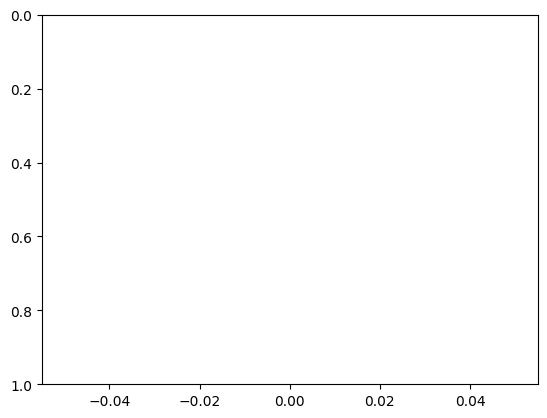

In [77]:
sns.scatterplot(x=carehomes_df_clean['longitude'], y = carehomes_df_clean['latitude'])

In [2]:
carehomes_df_clean

NameError: name 'carehomes_df_clean' is not defined

In [75]:
carehomes_df_clean = carehomes_df_clean.astype({'latitude':'float','longitude':'float', 'num_beds': "int"})
carehomes_df_clean.info()

ValueError: could not convert string to float: 'N/A': Error while type casting for column 'latitude'

In [ ]:
carehomes_df_clean.to_csv("../raw_data/carehome_locations.csv")

In [55]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [176]:
pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 2.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [180]:
carehomes_df.isna().sum()

Location_Names    0
latitude          0
longitude         0
num_beds          0
town_city         0
region            0
carehome_y_n      0
dtype: int64

In [193]:
!pwd

/home/willbanny/code/willbanny/Location-Analysis/carehome_api


In [194]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
golden_df = pd.read_csv('../raw_data/lables_wb.csv')
mapObj = folium.Map(location=[51.3895011342637,-0.107834356217441], zoom_start=11.5)
lats = golden_df['lat']
longs = golden_df['lng']
clusters = golden_df['Crimeless_Robust_Labels']
zipped = zip(lats, longs, clusters)
data = np.array(list(zipped))
HeatMap(data, scale_radius=True, radius=30).add_to(mapObj)
mapObj

In [5]:
! pwd


/home/willbanny/code/willbanny/Location-Analysis/carehome_api


In [7]:
import pandas as pd
df = pd.read_csv("../raw_data/carehome_locations.csv")

In [15]:
london_df = df[df['latitude'] <= 51.71]
london_df

,Unnamed: 0,Location_Names,latitude,longitude,num_beds,town_city,region,carehome_y_n
3,10,Kingswood House Nursing Home,50.857483,0.561912,22.0,St Leonards On Sea,South East,Y
4,13,Little Haven,51.442094,0.002853,15.0,London,London,Y
6,21,Tresillian Residential Home,50.355628,-4.702077,7.0,Par,South West,Y
7,22,Highlands Borders Care Home,50.721429,-3.507439,28.0,Exeter,South West,Y
14,87,Elmwood,51.258636,0.531267,6.0,Maidstone,South East,Y
...,...,...,...,...,...,...,...,...
20762,53344,Amberwood Lodge,50.723845,-1.939243,9.0,Poole,South West,Y
20763,53348,Chalcraft Hall Care Home,50.797358,-0.697754,20.0,Bognor Regis,South East,Y
20795,53445,Hillsview Care Services Ltd,51.555401,0.074329,5.0,Ilford,London,Y
20796,53446,Elysium Care Partnerships Limited - 13 Alexand...,51.473470,-0.363446,12.0,Hounslow,London,Y


In [17]:
london_df = london_df[london_df['latitude'] >= 51.285]
london_df = london_df[london_df['longitude'] <= 0.27]
london_df

,Unnamed: 0,Location_Names,latitude,longitude,num_beds,town_city,region,carehome_y_n
4,13,Little Haven,51.442094,0.002853,15.0,London,London,Y
38,228,EnhanceAble Space,51.392733,-0.253510,6.0,New Malden,London,Y
62,325,Harriotts Lane,51.304195,-0.315736,4.0,Ashtead,South East,Y
64,334,Peace Manor Residential Care Ltd - Waverley Ro...,51.484673,0.081430,4.0,London,London,Y
68,384,Holly Oak Care Centre,51.684354,-2.348679,46.0,Dursley,South West,Y
...,...,...,...,...,...,...,...,...
20742,53195,Fen Grove,51.448327,0.094356,4.0,Sidcup,London,Y
20743,53196,Emerton Close,51.457648,0.132526,10.0,Bexleyheath,London,Y
20758,53330,Knowles House,51.540403,-0.242273,39.0,London,London,Y
20795,53445,Hillsview Care Services Ltd,51.555401,0.074329,5.0,Ilford,London,Y
